<h1>Curse of dimensionality</h1>

<p>The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience.</p>

<img src="https://4.bp.blogspot.com/-9d2A3kOhp2A/WBhPckLRvLI/AAAAAAAAElA/c5pGzextBlcStvIi9P8zcpmmNPc8fMfpgCLcB/s1600/curse.jpg" />

<ul>
<li>Concentration of scores and distances: derived values such as distances become numerically similar</li>
<li>Irrelevant attributes: in high dimensional data, a significant number of attributes may be irrelevant</li>
<li>Definition of reference sets: for local methods, reference sets are often nearest-neighbor based</li>
<li>Incomparable scores for different dimensionalities: different subspaces produce incomparable scores</li>
<li>Interpretability of scores: the scores often no longer convey a semantic meaning</li>
<li>Exponential search space: the search space can no longer be systematically scanned</li>
<li>Data snooping bias: given the large search space, for every desired significance a hypothesis can be found</li>
<li>Hubness: certain objects occur more frequently in neighbor lists than others.</li>
</ul>

<h1>Principal Component Analysis (PCA)</h1>

<p>The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.</p>

<img src="https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_7/PCA_3d.png" />

<h2>The Algorithm</h2>

<ol>
    <li>Standardize the data.</li>

    <li>Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.</li>

    <li>Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d).</li>

    <li>Construct the projection matrix W from the selected k eigenvectors.</li>

    <li>Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.</li>
    
</ol>

<h3>Standardize the data</h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("./bank/preprocessed.csv")
dataset = dataset.dropna(how='any')
Y = dataset.pop("y")
X = dataset

<p>let us continue with the transformation of the data onto unit scale (mean=0 and variance=1)</p>

In [3]:
from sklearn.preprocessing import StandardScaler
cols = ["age", "job", "education", "day", "month", "campaign", "pdays", "previous", "poutcome"]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

<h3>Eigenvectors & Eigenvalues</h3>

<p>The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.</p>

<h4>Covariance Matrix</h4>

$$ \Sigma = \frac{1}{n-1} ((X-\bar{x})^T(X-\bar{x})) $$

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i} $$

In [4]:
X.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.001359,0.062115,0.186337,0.225221,0.002289,-0.000077,-0.077579,-0.005489,-0.037450,0.003984,0.000781,0.001966,-0.025481,-0.064967,-0.035951,0.009690
job,0.062115,1.001359,0.015425,0.296912,-0.002422,-0.001410,-0.030567,-0.024077,0.005158,0.011276,0.065486,-0.003357,-0.022530,-0.015240,0.000951,0.055946
marital,0.186337,0.015425,0.209136,0.098212,0.000660,-0.000929,0.004236,0.005894,-0.002780,-0.004083,0.016666,-0.001321,0.007237,0.007705,-0.014677,-0.016305
education,0.225221,0.296912,0.098212,1.001359,-0.001789,-0.004302,0.052550,0.015257,-0.017866,-0.040781,-0.131166,-0.001118,-0.031239,0.139968,-0.008772,-0.033973
default,0.002289,-0.002422,0.000660,-0.001789,0.006747,-0.000143,0.002323,0.000511,0.000498,-0.000254,-0.002043,0.000150,0.002367,0.005137,-0.000025,0.002492
balance,-0.000077,-0.001410,-0.000929,-0.004302,-0.000143,0.001584,-0.001047,-0.001058,-0.000459,-0.000357,0.002498,-0.000078,0.001726,-0.003241,-0.000543,0.000102
housing,-0.077579,-0.030567,0.004236,0.052550,0.002323,-0.001047,0.225319,0.016926,0.010239,-0.045868,-0.037687,0.000629,0.016962,0.140612,-0.000123,-0.118962
loan,-0.005489,-0.024077,0.005894,0.015257,0.000511,-0.001058,0.016926,0.109396,0.005083,0.012862,-0.015185,-0.000351,0.010211,-0.002500,0.004642,-0.034795
contact,-0.037450,0.005158,-0.002780,-0.017866,0.000498,-0.000459,0.010239,0.005083,0.067994,0.003402,-0.002297,-0.000608,-0.022672,0.014750,-0.000192,-0.002500
day,0.003984,0.011276,-0.004083,-0.040781,-0.000254,-0.000357,-0.045868,0.012862,0.003402,1.001359,0.062639,0.000508,-0.018950,-0.112990,-0.009401,0.014223


In [5]:
eig_vals, eig_vecs = np.linalg.eig(X.cov())
eig_vals

array([1.51696315, 1.4094914 , 1.10129573, 0.98554317, 0.98330208,
       0.91325716, 0.89637065, 0.70944916, 0.59329736, 0.15681262,
       0.18992284, 0.10469805, 0.06412768, 0.00153096, 0.00667525,
       0.00626991])

In [6]:
eig_vecs

array([[-1.78042360e-01, -4.72147705e-01, -1.12550236e-01,
        -6.71105140e-01,  1.36583681e-01, -2.67488331e-01,
        -1.28040146e-01, -7.33540687e-02,  3.46772979e-01,
         2.19715453e-01,  3.41837806e-03,  1.65757572e-02,
         3.86389839e-02,  1.03888731e-03, -5.54286755e-03,
        -3.16171284e-03],
       [-1.87622955e-01, -5.14771059e-01,  1.63079488e-01,
         5.72843363e-01,  2.81372353e-03, -2.21653057e-02,
         1.66791647e-01,  3.00476216e-01,  4.70799480e-01,
         1.57709535e-03,  6.18486800e-02,  2.38366684e-02,
        -1.97827417e-02, -8.26692007e-04,  2.28311118e-03,
         3.73903449e-03],
       [-7.09936848e-02, -1.11564122e-01, -2.08334716e-02,
        -1.32519130e-01,  4.24831000e-02, -8.86823468e-02,
        -2.93698240e-02, -4.22149992e-02, -1.73507376e-03,
        -8.69208471e-01,  4.35828395e-01, -6.82804634e-02,
        -4.42665289e-02, -3.86802217e-03,  1.41499917e-03,
         9.61491095e-03],
       [-4.99858534e-01, -4.55312552e

<p><b>Note:</b> Covariance Matrix, Correlation Matrix and Singular Value Decomposition (SVD) yield the same eigenvalues and eigenvectors except that SVD may be faster</p>

<h3>Sort Eigenvalues</h3>

In [7]:
eig_vecs.shape

(16, 16)

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.5169631500754637
1.4094914034864527
1.1012957349227366
0.9855431652692539
0.9833020796679375
0.9132571561600153
0.8963706456490429
0.7094491598666277
0.593297361925172
0.1899228399692851
0.156812615260081
0.10469805464759753
0.06412767677334325
0.006675251516061018
0.006269909520549987
0.0015309606929936861


<p>How many principal components are we going to choose for our new feature subspace?</p>

<p><b>The explained variance</b> tells us how much information (variance) can be attributed to each of the principal components.</p>

In [9]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [10]:
var_exp

[15.737753111340295,
 14.622786136580068,
 11.425406331013308,
 10.224529854139687,
 10.201279683630837,
 9.4745977514985,
 9.299408437690504,
 7.360189153225871,
 6.155170877501785,
 1.970356870892026,
 1.6268544318851645,
 1.0861912731364214,
 0.6652933821184133,
 0.06925248006890758,
 0.06504725448337291,
 0.015882970794842636]

In [11]:
cum_var_exp

array([ 15.73775311,  30.36053925,  41.78594558,  52.01047543,
        62.21175512,  71.68635287,  80.98576131,  88.34595046,
        94.50112134,  96.47147821,  98.09833264,  99.18452391,
        99.84981729,  99.91906977,  99.98411703, 100.        ])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

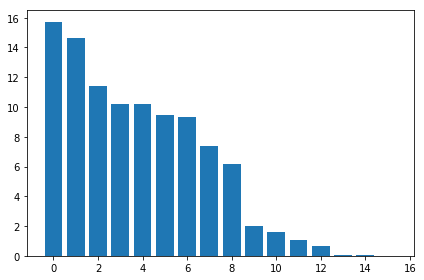

In [13]:
plt.bar(range(len(var_exp)), var_exp)
plt.tight_layout()

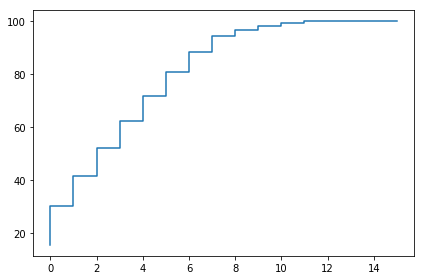

In [14]:
plt.step(range(len(var_exp)), cum_var_exp)
plt.tight_layout()

<h3>The Projection Matrix</h3>

 <p>It is basically just a matrix of our concatenated top k eigenvectors and it has the shape of d x k where d is the number of the original features and k is the number of the new features.</p>

In [38]:
d = 16
k = 10
eig_pairs[0][1].reshape(d,1).shape

(16, 1)

In [39]:
matrix_w = eig_pairs[0][1].reshape(d, 1)
for i in range(1, k):
    matrix_w = np.concatenate((matrix_w, eig_pairs[i][1].reshape(d, 1)), axis=1)
matrix_w.shape

(16, 10)

<h3>Projection</h3>

In [40]:
X.dot(matrix_w)

,0,1,2,3,4,5,6,7,8,9
1,-1.364023,0.151071,0.082202,1.435578,-0.371983,0.043861,-0.680513,0.061528,0.303837,1.366085
2,-0.199778,1.994309,-1.271958,0.002161,-0.034162,0.289589,-0.221226,-0.323858,0.403146,0.867355
5,0.635066,1.592298,-0.641798,-0.526360,0.933278,1.139677,-0.243805,0.707858,0.197205,0.174786
6,-0.143594,0.019077,-0.248027,1.229267,-0.588186,0.296397,0.451782,-0.365545,1.715871,1.590876
9,-1.468709,-1.590691,-0.548381,0.529981,0.300094,0.538501,-0.380045,0.919233,-0.954217,1.402341
14,-0.804846,0.547469,-1.263927,0.643291,1.329029,1.872276,-0.004162,0.346400,-0.366375,1.489219
17,0.411697,0.370460,-0.914933,0.715917,0.391636,0.552443,-0.175056,1.165187,0.888014,1.159033
19,0.217482,-0.869040,-0.204551,1.175768,-1.432901,-0.060847,0.598981,0.439338,-0.313503,0.649631
38,-1.173778,1.389323,-0.596282,0.071244,-1.000699,-0.228994,-0.563051,-0.498286,-0.773306,1.068672
46,-0.926637,-1.950825,0.709601,-2.100169,-1.186696,0.239880,0.650764,1.394715,-1.302843,0.476137


<h2>Logistic Regression</h2>

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [44]:
logistic_model.fit(X_train, y_train)
"{:.2%}".format(logistic_model.score(X_test, y_test))

'83.78%'

<h2>Sci-Kit Learn</h2>

In [46]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=k)
sklearn_pca.fit_transform(X)

array([[-1.23833999, -0.14010627,  0.10401383, ..., -0.12289596,
         0.35886907, -0.40410183],
       [-0.07409475, -1.98334395, -1.25014609, ...,  0.26249018,
         0.45817792,  0.09462768],
       [ 0.76074884, -1.58133373, -0.61998634, ..., -0.76922634,
         0.25223704,  0.78719663],
       ...,
       [-0.36647483, -0.23830495, -0.00898035, ..., -1.00467773,
        -0.66901011, -0.38674957],
       [-0.38599959, -0.68678422,  1.40429864, ..., -0.58782686,
        -0.53492682,  0.42680124],
       [ 0.37779865, -0.82920846,  1.27175839, ...,  0.01864154,
         1.00285449, -0.24682153]])